# Analysis of unstructured data

### comparison of channels: BezPlanu - Urbex History

In [172]:
from googleapiclient.discovery import build

In [1]:
api_key = ""

In [174]:
ch_name1 = "UCNu7GSRF7Y10OIWHQHpAx1g" #BezPlanu
ch_name2 = "UC7XgxJhy6N6KGMFzELHtlUQ"#Urbex History

In [175]:
def get_all_videos_from_channel(channel_id,api_key=api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)
    response = youtube.channels().list(part='contentDetails', id=channel_id).execute()
    uploads_id = response["items"][0]['contentDetails']['relatedPlaylists']['uploads'] #

    videos_ids = []
    
    videos = youtube.playlistItems().list(part='contentDetails', playlistId=uploads_id,maxResults=50).execute()
    videosids = [item['contentDetails']['videoId'] for item in videos['items']]
    data = youtube.videos().list(part='statistics', id=videosids).execute()["items"]
    
    while 'nextPageToken' in videos:
        videos = youtube.playlistItems().list(pageToken=videos['nextPageToken'],part='contentDetails', playlistId=uploads_id,maxResults=50).execute()
        videosids = [item['contentDetails']['videoId'] for item in videos['items']]
        data += youtube.videos().list(part='statistics', id=videosids).execute()["items"]
    
    return data

In [ ]:
x = get_all_videos_from_channel(ch_name1)
x

In [ ]:
y = get_all_videos_from_channel(ch_name2)
y

In [178]:
youtube = build('youtube', 'v3', developerKey=api_key)
r1 = youtube.channels().list(part='statistics', id=ch_name1).execute()
r2 = youtube.channels().list(part='statistics', id=ch_name2).execute()

In [179]:
r1,r2

({'kind': 'youtube#channelListResponse',
  'etag': '8p6t4hMPyTvU3n5XEuhkF0uLCA4',
  'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
  'items': [{'kind': 'youtube#channel',
    'etag': 'K6EOSPBrgq80jIGvUjxzDlplips',
    'id': 'UCNu7GSRF7Y10OIWHQHpAx1g',
    'statistics': {'viewCount': '102950468',
     'subscriberCount': '608000',
     'hiddenSubscriberCount': False,
     'videoCount': '172'}}]},
 {'kind': 'youtube#channelListResponse',
  'etag': 'EQcsW3_QOu2W6ndiZ1XBGagZMl4',
  'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
  'items': [{'kind': 'youtube#channel',
    'etag': 'vV6g6IkYx7kvBq4YDWgSJ3v9JHs',
    'id': 'UC7XgxJhy6N6KGMFzELHtlUQ',
    'statistics': {'viewCount': '173089208',
     'subscriberCount': '1120000',
     'hiddenSubscriberCount': False,
     'videoCount': '443'}}]})

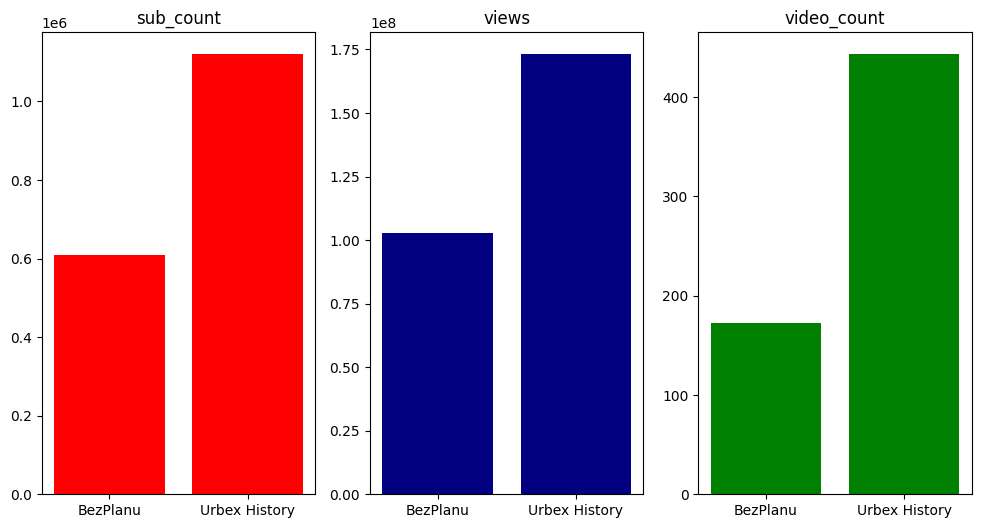

In [180]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
channels = ['BezPlanu', 'Urbex History']
sub_count = [int(r1["items"][0]['statistics']['subscriberCount']), int(r2["items"][0]['statistics']['subscriberCount'])]  
views = [int(r1["items"][0]['statistics']['viewCount']), int(r2["items"][0]['statistics']['viewCount'])] 
video_count = [int(r1["items"][0]['statistics']['videoCount']), int(r2["items"][0]['statistics']['videoCount'])]

plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
plt.bar(channels,sub_count, color = "red")
plt.title("sub_count")

plt.subplot(1,3,2)
plt.bar(channels,views, color = "navy")
plt.title("views")

plt.subplot(1,3,3)
plt.bar(channels,video_count, color = "green")
plt.title("video_count")
plt.show()

plt.show()


## Difference: "Urbex History" is bigger in every statistic above

In [181]:
Views_ch1 = [int(x[i]['statistics']['viewCount']) for i in range(len(x))]
Views_ch2 = [int(y[i]['statistics']['viewCount']) for i in range(len(y))]

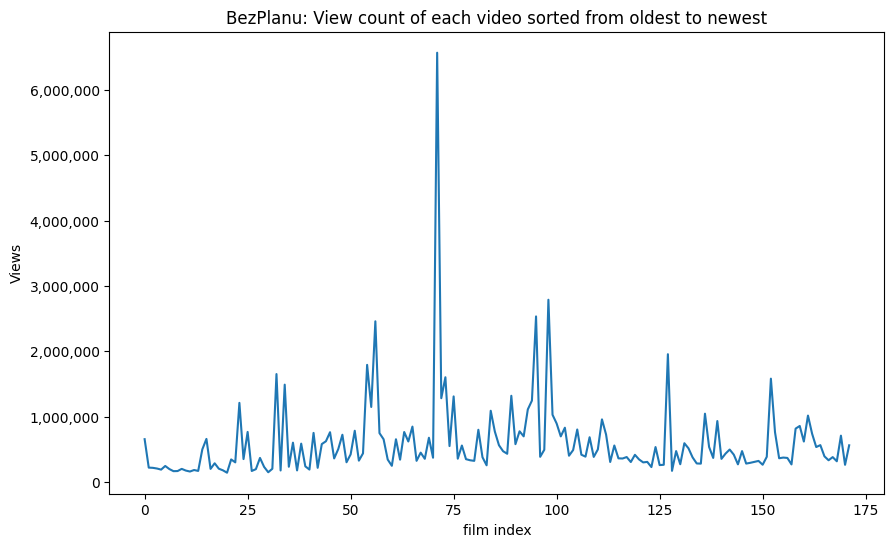

In [182]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10,6))
plt.plot(Views_ch1[::-1])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
plt.title("BezPlanu: View count of each video sorted from oldest to newest")
plt.ylabel("Views")
plt.xlabel("film index")
plt.show()

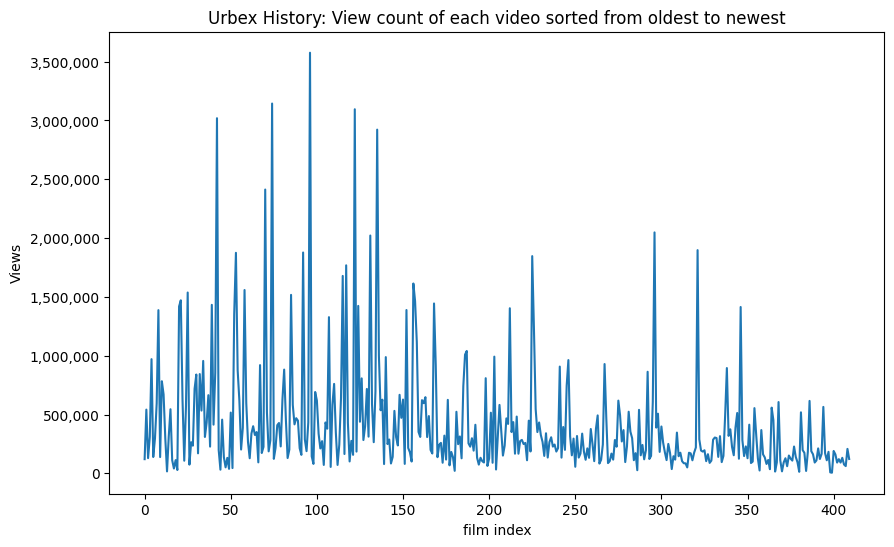

In [183]:
plt.figure(figsize=(10,6))
plt.plot(Views_ch2[::-1])
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: format(int(x), ',')))
plt.title("Urbex History: View count of each video sorted from oldest to newest")
plt.ylabel("Views")
plt.xlabel("film index")
plt.show()
plt.show()

## Difference: Urbex History has bigger variance
## Similarity: They both have stable growth with no significant uptrend

In [184]:
likes_ch1 = [int(x[i]['statistics']['likeCount']) for i in range(len(x))]
likes_ch2 = [int(y[i]['statistics']['likeCount']) for i in range(len(y))]

coms_ch1 = [int(x[i]['statistics']['commentCount']) for i in range(len(x))]
coms_ch2 = [int(y[i]['statistics']['commentCount']) for i in range(len(y))]

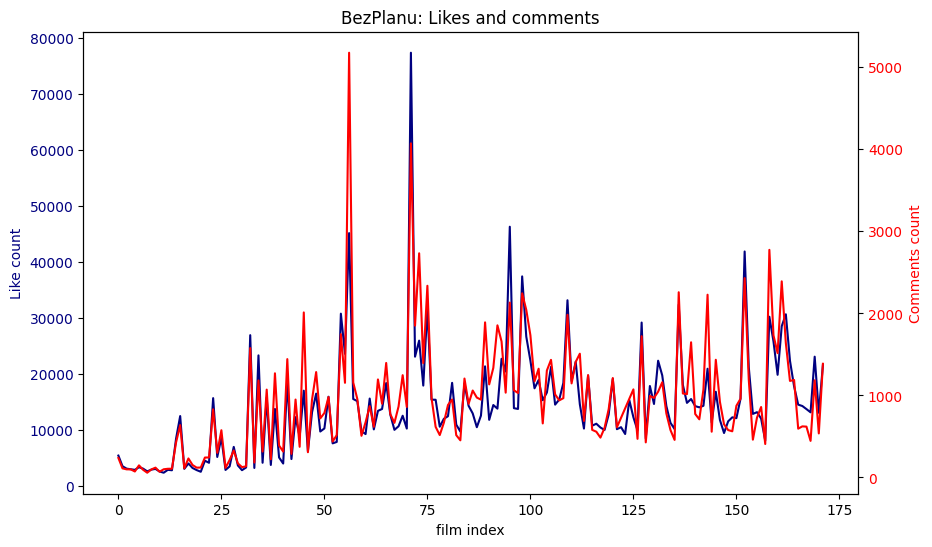

In [185]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('film index')
ax1.set_ylabel('Like count', color="navy")
ax1.plot(likes_ch1[::-1], color="navy")
ax1.tick_params(axis='y', labelcolor="navy")

ax2 = ax1.twinx()
ax2.set_ylabel('Comments count', color="red")
ax2.plot(coms_ch1[::-1], color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title('BezPlanu: Likes and comments')
plt.show()

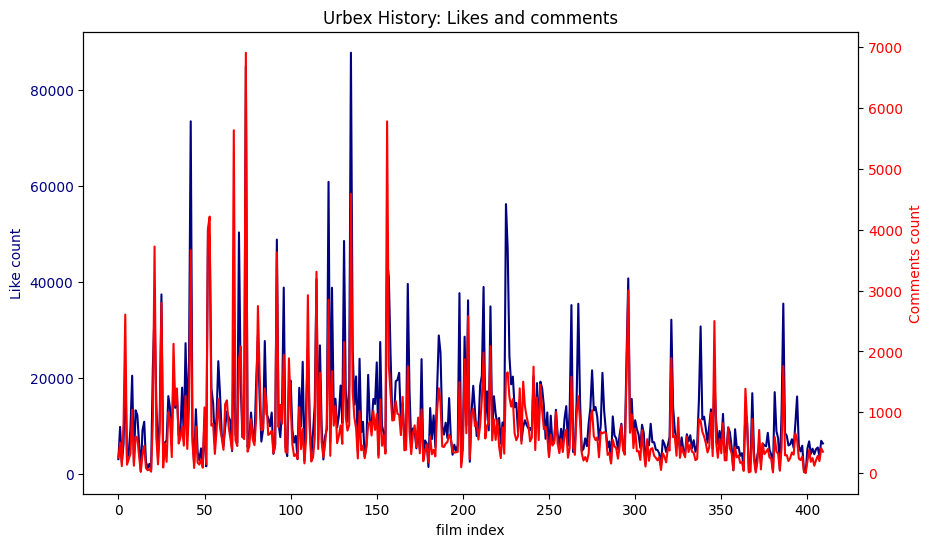

In [186]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('film index')
ax1.set_ylabel('Like count', color="navy")
ax1.plot(likes_ch2[::-1], color="navy")
ax1.tick_params(axis='y', labelcolor="navy")

ax2 = ax1.twinx()
ax2.set_ylabel('Comments count', color="red")
ax2.plot(coms_ch2[::-1], color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.title('Urbex History: Likes and comments')
plt.show()

## Similarity: Big correlation between like and comment count

In [187]:
ch1_mostpopular = max(x, key=lambda i: int(i['statistics']['viewCount']))
ch2_mostpopular = max(y, key=lambda i: int(i['statistics']['viewCount']))

In [188]:
ch1_mostpopular,ch2_mostpopular

({'kind': 'youtube#video',
  'etag': 'IvEPUqU_Qfjt5iCToxMkF_6qOFY',
  'id': '_oWQTyGbpUQ',
  'statistics': {'viewCount': '6565788',
   'likeCount': '77397',
   'favoriteCount': '0',
   'commentCount': '4073'}},
 {'kind': 'youtube#video',
  'etag': 'Uk037w-VnbybtGgrN2kGEc2dNds',
  'id': '46Tejj-15LU',
  'statistics': {'viewCount': '3575189',
   'likeCount': '38804',
   'favoriteCount': '0',
   'commentCount': '1946'}})

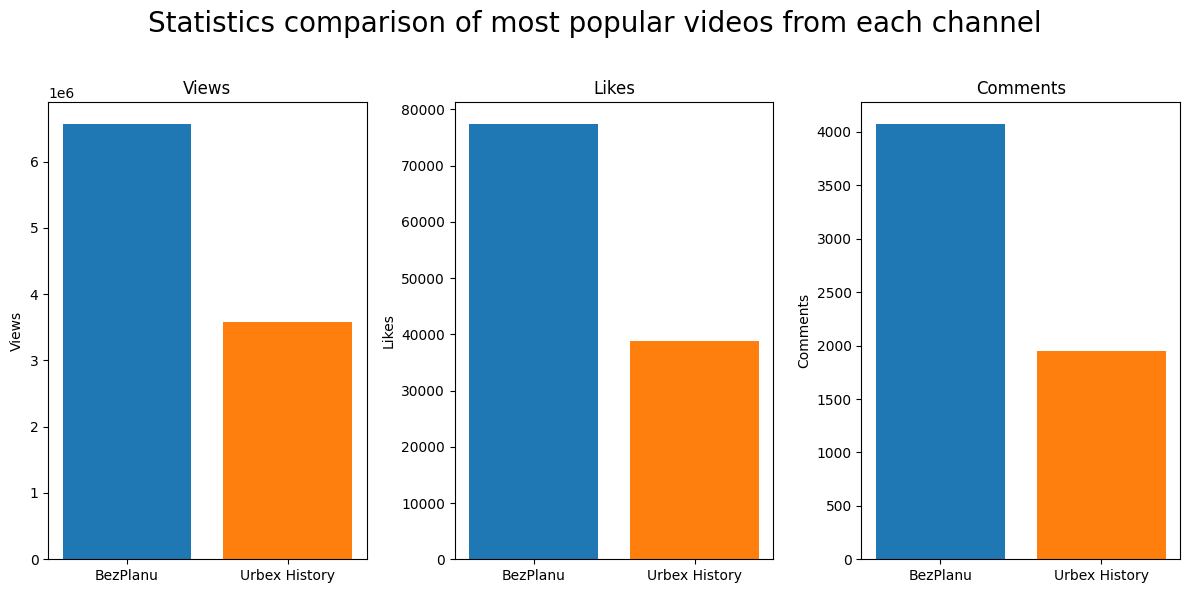

In [189]:
statistics_names = ['viewCount', 'likeCount', 'commentCount']
ch1_video_stats = [int(ch1_mostpopular['statistics'][stat]) for stat in statistics_names]
ch2_video_stats = [int(ch2_mostpopular['statistics'][stat]) for stat in statistics_names]


index = np.arange(len(statistics_names))
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

axes[0].bar(channels, [ch1_video_stats[0], ch2_video_stats[0]], color=['tab:blue', 'tab:orange'])
axes[0].set_ylabel('Views')
axes[0].set_title("Views")

axes[1].bar(channels, [ch1_video_stats[1], ch2_video_stats[1]], color=['tab:blue', 'tab:orange'])
axes[1].set_ylabel('Likes')
axes[1].set_title("Likes")

axes[2].bar(channels, [ch1_video_stats[2], ch2_video_stats[2]], color=['tab:blue', 'tab:orange'])
axes[2].set_ylabel('Comments')
axes[2].set_title('Comments')


plt.suptitle('Statistics comparison of most popular videos from each channel',fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()